In [ ]:
import pandas as pd

# Analysing Discounts

In [ ]:
# orders_ql.csv
url = "https://drive.google.com/file/d/1QAF56fIWKBjyEE52NZe-TMG4eVF54m6o/view" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_ql = pd.read_csv(path)

# orderlines_ql.csv
url = "https://drive.google.com/file/d/143QNOYeuErSPosnLqC7uQkB4yBAV1zES/view" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_ql = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_ql = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands_ql = pd.read_csv(path)



**bold text**# New Section

In [ ]:
# making copies
orders_c = orders_ql.copy()
orderlines_c = orderlines_ql.copy()
products_c = products_ql.copy()
brands_c = brands_ql.copy()

**`date` should be format datetime**

In [ ]:
orderlines_c["date"] = pd.to_datetime(orderlines_c["date"])
orderlines_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   order_id          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   unit_price_total  53231 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 3.2+ MB


**`created_date` should be datetime**

In [ ]:
orders_c["created_date"] = pd.to_datetime(orders_c["created_date"])
orders_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40985 non-null  int64         
 1   created_date  40985 non-null  datetime64[ns]
 2   total_paid    40985 non-null  float64       
 3   state         40985 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


## 1. Create Output Table (like LMS)

### 1.1. Join `Brands` and `Products` 

**new column `short`to merge brands and products**

In [ ]:
products_c['short'] = products_c.sku.str[:3]

pro_bra_m = products_c.merge(brands_c, on='short', how='left')
pro_bra_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9991
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
 6   short     9992 non-null   object 
 7   long      9806 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 702.6+ KB


**`short` can be deleted - it is no longer needed**

In [ ]:
pro_bra_m = pro_bra_m.drop(labels="short", axis=1)
pro_bra_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
 6   long      9806 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 624.5+ KB


**`long` is renamed to `brand`**

In [ ]:
pro_bra_m.rename(columns={"long":"brand"}, inplace=True)
pro_bra_m.head()

,sku,name,desc,price,in_stock,type,brand
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Kingston


In [ ]:
#changing column "in_store" to boolean

### 1.2. Join `Products` and `Orderlines`

**Merge oderlines with products and drop columns not needed**

In [ ]:
ol_pro_m = orderlines_c.merge(pro_bra_m[["sku", "name", "price", "in_stock", "type", "brand"]], on="sku", how="left")

ol_pro_m = ol_pro_m.drop(labels=["id", "product_id"], axis=1)
ol_pro_m.head()

,order_id,product_quantity,sku,unit_price,date,unit_price_total,name,price,in_stock,type,brand
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1,12755395,OWC
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,22.95,0,5720,iOttie
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,89.00,1,13005399,Apple
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,76.99,0,1298,Crucial
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,299.99,0,11905404,Pebble


### 1.3. Create `discount`

In [ ]:
#create a new column 'discount'
ol_pro_m["discount"] = ol_pro_m["price"] - ol_pro_m["unit_price"]
ol_pro_m.head()

,order_id,product_quantity,sku,unit_price,date,unit_price_total,name,price,in_stock,type,brand,discount
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1,12755395,OWC,13.50
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,22.95,0,5720,iOttie,3.96
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,89.00,1,13005399,Apple,16.81
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,76.99,0,1298,Crucial,16.09
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,299.99,0,11905404,Pebble,157.50


count    53231.000000
mean        26.116673
std         45.545881
min       -170.990000
25%          5.250000
50%         15.000000
75%         31.000000
max       1320.000000
Name: discount, dtype: float64

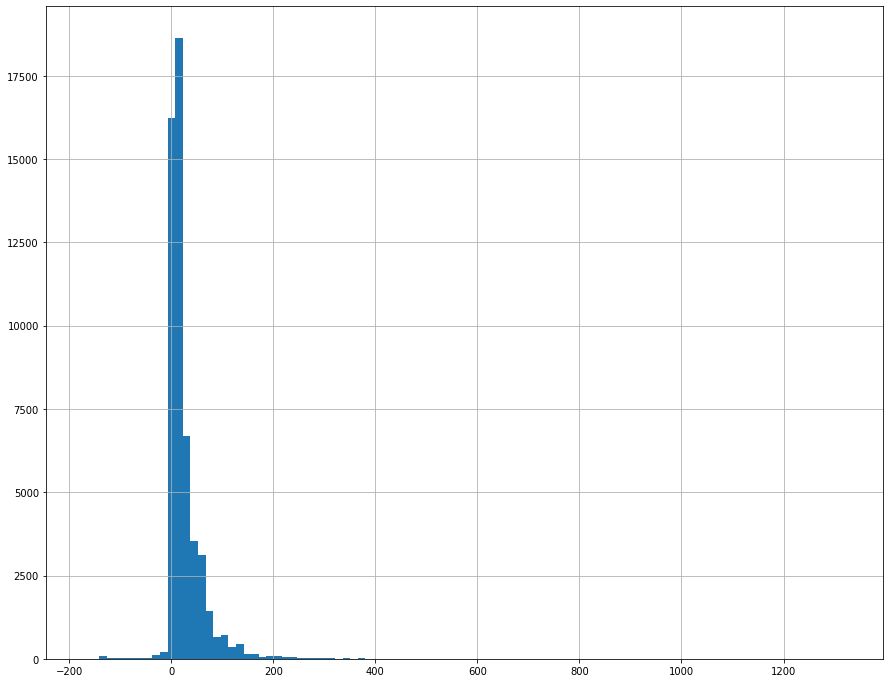

In [ ]:
#look at discounts
ol_pro_m.discount.hist(bins=100, figsize=(15,12))
ol_pro_m.discount.describe()
#ol_pro_m.groupby("order_id").discount.mean().nsmallest(40)

In [ ]:
ol_pro_m.order_id.nunique()

40985

In [ ]:
ol_pro_m.discount.count()

53231

**There are crazy values such as 1320EUR discount and -170EUR discount (which means that the customer payed 170EUR more than it was worth.**
Thus we decided to remove the outliers -- in total 4436 orderlines. 

In [ ]:
#getting rid of outliers

# your code here
# calculate the quartiles
Q1 = ol_pro_m.discount.quantile(0.25)
Q3 = ol_pro_m.discount.quantile(0.75)

# calculates the IQR
IQR = Q3 - Q1

# keep only the differences that are within Q1-1.5*IQR  and Q3-1.5*IQR
ol_pro_m_ql = ol_pro_m.loc[(ol_pro_m.discount >= (Q1 - 1.5*IQR)) & (ol_pro_m.discount<= (Q3 + 1.5*IQR)), :].copy()

ol_pro_m_ql_2 = ol_pro_m.loc[(ol_pro_m.discount >= (Q1 - 1.5*IQR)) & (ol_pro_m.discount<= (Q3 + 2.5*IQR)), :].copy()

ol_pro_m_ql_3 = ol_pro_m.loc[(ol_pro_m.discount >= (Q1 - 1.5*IQR)) & (ol_pro_m.discount<= (Q3 + 3.5*IQR)), :].copy()

ol_pro_m_ql_4 = ol_pro_m.loc[(ol_pro_m.discount >= (Q1 - 4.5*IQR)) & (ol_pro_m.discount<= (Q3 + 4.5*IQR)), :].copy()

In [ ]:
ol_pro_m_ql.describe()

,order_id,product_quantity,unit_price,unit_price_total,price,in_stock,discount
count,48795.000000,48795.000000,48795.000000,48795.000000,48795.000000,48795.000000,48795.000000
mean,413669.460006,1.130895,112.548440,122.771959,130.413499,0.594958,17.865059
std,65437.783961,0.825950,152.600086,180.186603,159.205906,0.490905,16.983087
min,241423.000000,1.000000,1.990000,1.990000,2.990000,0.000000,-33.000000
25%,361680.500000,1.000000,24.990000,26.340000,35.000000,0.000000,5.000000
50%,415838.000000,1.000000,56.310000,59.990000,73.980000,1.000000,13.200000
75%,469264.000000,1.000000,129.000000,139.990000,154.990000,1.000000,25.000000
max,527112.000000,72.000000,999.990000,6876.800000,1059.000000,1.000000,69.460000


### 1.3.1. discount-outliers

In [ ]:
ol_pro_m_deleted_outliers = ol_pro_m.loc[((ol_pro_m.discount >= (Q1 - 1.5*IQR)) & (ol_pro_m.discount<= (Q3 + 1.5*IQR))) == False , :].copy()


In [ ]:
ol_pro_m_deleted_outliers_2 = ol_pro_m.loc[((ol_pro_m.discount >= (Q1 - 1.5*IQR)) & (ol_pro_m.discount<= (Q3 + 2.5*IQR))) == False , :].copy()


In [ ]:
ol_pro_m_deleted_outliers_3 = ol_pro_m.loc[((ol_pro_m.discount >= (Q1 - 1.5*IQR)) & (ol_pro_m.discount<= (Q3 + 3.5*IQR))) == False , :].copy()


In [ ]:
ol_pro_m_deleted_outliers_4 = ol_pro_m.loc[((ol_pro_m.discount >= (Q1 - 4.5*IQR)) & (ol_pro_m.discount<= (Q3 + 4.5*IQR))) == False , :].copy()


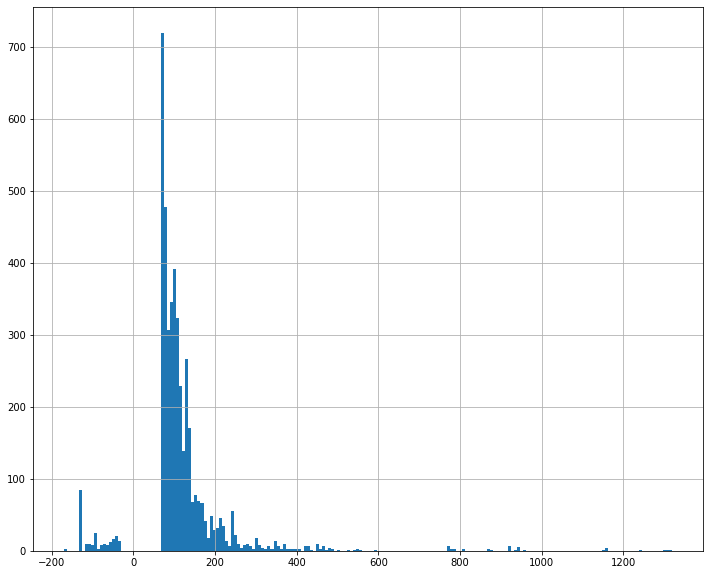

In [ ]:
#ol_pro_m_deleted_outliers.order_ids.describe()
ol_pro_m_deleted_outliers.discount.hist(bins=200, figsize=(12,10))

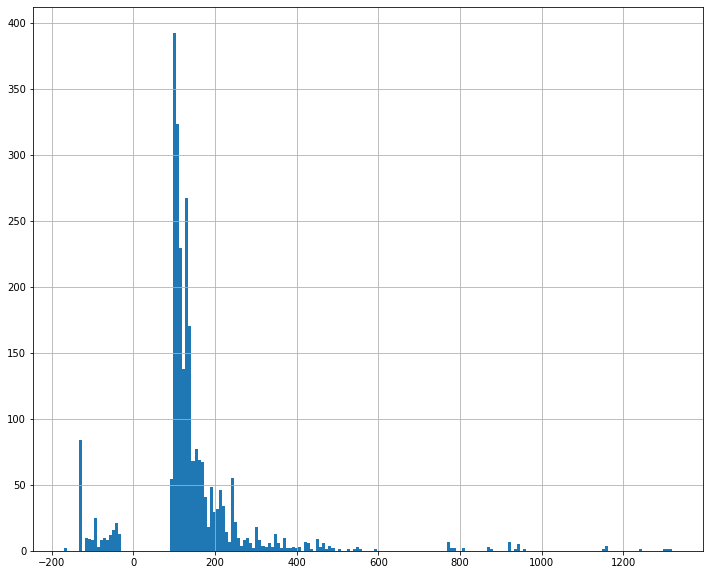

In [ ]:
ol_pro_m_deleted_outliers_2.discount.hist(bins=200, figsize=(12,10))

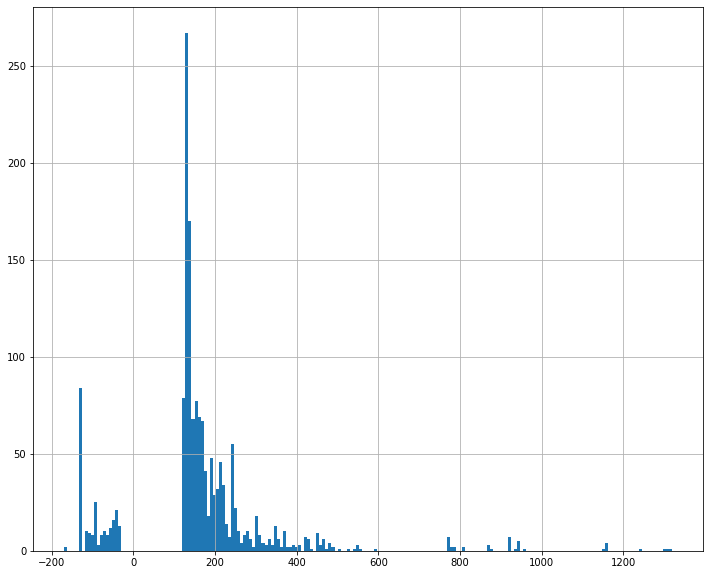

In [ ]:
ol_pro_m_deleted_outliers_3.discount.hist(bins=200, figsize=(12,10))

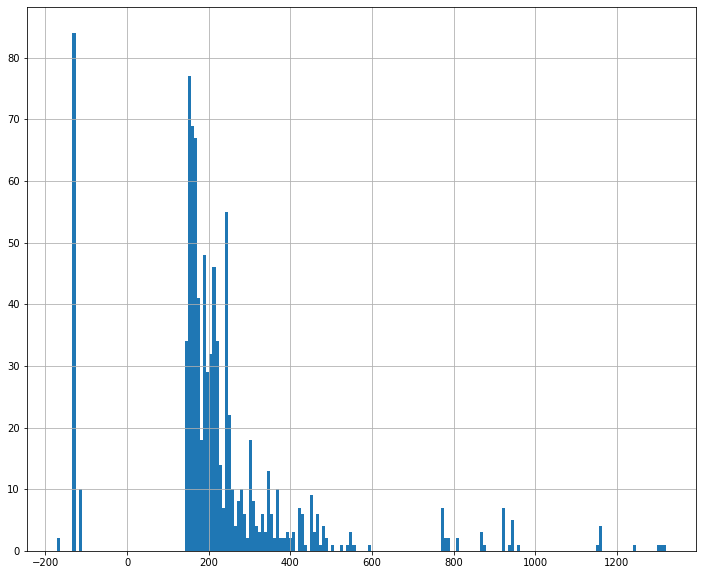

In [ ]:
ol_pro_m_deleted_outliers_4.discount.hist(bins=200, figsize=(12,10))

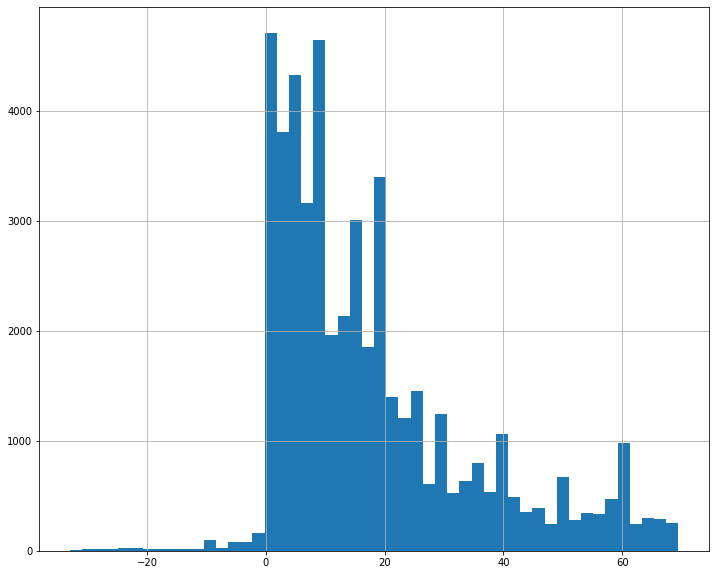

In [ ]:
ol_pro_m_ql.discount.hist(bins=50, figsize=(12,10))

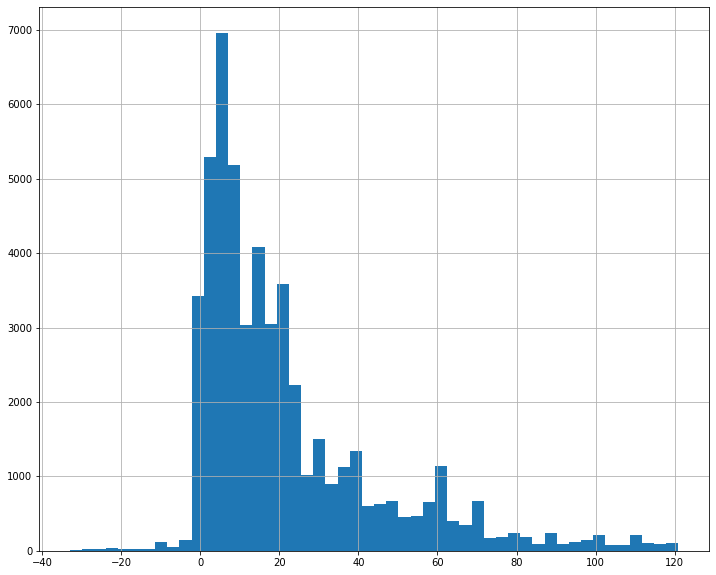

In [ ]:
ol_pro_m_ql_3.discount.hist(bins=50, figsize=(12,10))

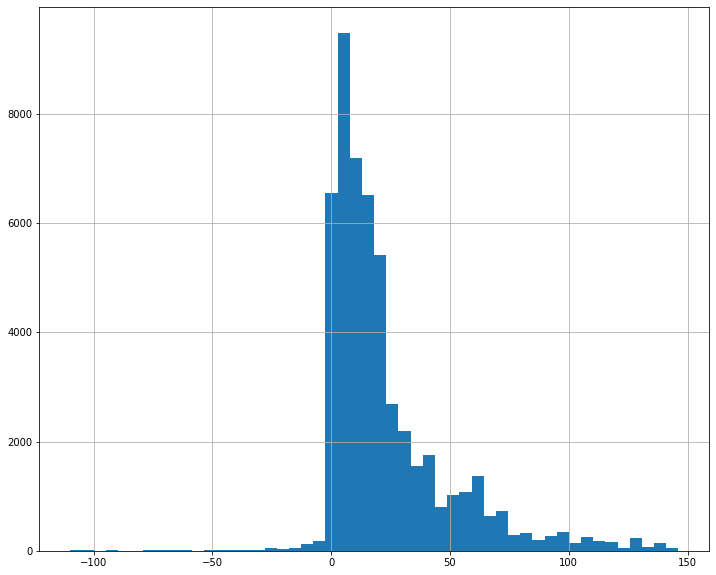

In [ ]:
ol_pro_m_ql_4.discount.hist(bins=50, figsize=(12,10))

### 1.4. Create Column `discount_percentage`

In [ ]:
ol_pro_m_ql["discount_percentage"] = ol_pro_m["discount"] / ol_pro_m["price"] *100

count    48795.000000
mean        20.675015
std         17.536674
min       -212.265332
25%          8.335186
50%         16.795995
75%         27.785496
max         97.140815
Name: discount_percentage, dtype: float64

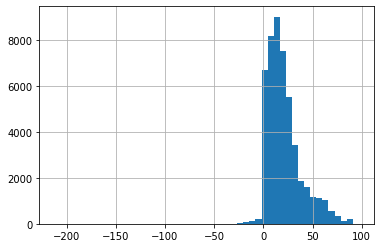

In [ ]:
ol_pro_m_ql.discount_percentage.hist(bins=50)
ol_pro_m_ql.discount_percentage.describe()



**INFO**
* We will not remove outliers for discount_percentage, because the actual value (associated with it) is not that high.

In [ ]:
ol_pro_m_ql.loc[ol_pro_m_ql.discount_percentage < 0, :].order_id.describe()

count      1342.000000
mean     386007.683308
std       62570.895541
min      267375.000000
25%      327531.000000
50%      376229.000000
75%      420466.500000
max      524782.000000
Name: order_id, dtype: float64

In [ ]:
ol_pro_m_ql.groupby("type").discount_percentage.min().sort_values() #loc[ol_pro_m_ql.discount_percentage < 0, :]

type
21485407   -212.265332
1,44E+11    -50.012503
11905404    -34.114114
11935397    -34.024126
57445397    -30.792918
               ...    
21561716     13.130661
12031714     19.442907
2434         19.879760
79201715     25.142241
54025401     29.469941
Name: discount_percentage, Length: 103, dtype: float64

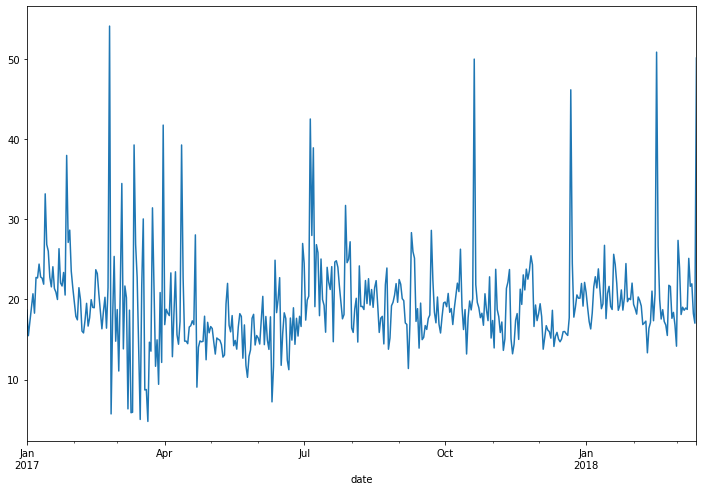

In [ ]:
ol_pro_m_ql.resample("D", on="date")["discount_percentage"].mean().plot(figsize=(12,8), kind="line"); 


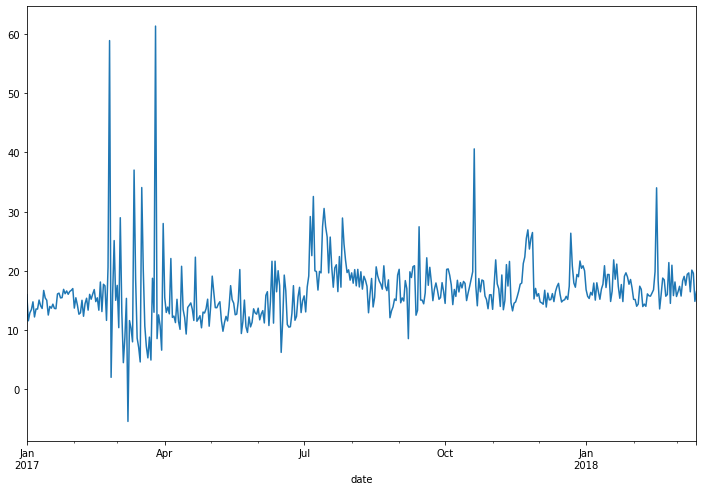

In [ ]:
ol_pro_m_ql.resample("D", on="date")["discount"].mean().plot(figsize=(12,8), kind="line"); 


In [ ]:
#grouping by quantity and calculating discount
#how many items have 0 discount
#month wise discount
#year wise discount
#counting values which have negative discount

## 2. Comparison between df with discount-outliers and df without-outliers

## 2.1. Values from the dataframe with outliers

In [ ]:
ol_pro_m.loc[ol_pro_m.discount < 0, :].count()

order_id            1571
product_quantity    1571
sku                 1571
unit_price          1571
date                1571
unit_price_total    1571
name                1571
price               1571
in_stock            1571
type                1567
brand               1571
discount            1571
dtype: int64

In [ ]:
ol_pro_m.loc[ol_pro_m.discount < 0, :].order_id.nunique()

1509

In [ ]:
ol_pro_m.describe()

,order_id,product_quantity,unit_price,unit_price_total,price,in_stock,discount
count,53231.000000,53231.000000,53231.000000,53231.000000,53231.000000,53231.000000,53231.000000
mean,414086.772369,1.127369,135.484903,146.854359,161.601576,0.574045,26.116673
std,65584.817961,0.815204,180.719645,209.287555,202.493100,0.494492,45.545881
min,241423.000000,1.000000,1.990000,1.990000,2.990000,0.000000,-170.990000
25%,362219.500000,1.000000,26.990000,29.740000,35.990000,0.000000,5.250000
50%,416762.000000,1.000000,64.990000,69.950000,87.980000,1.000000,15.000000
75%,469651.500000,1.000000,154.000000,166.140000,179.990000,1.000000,31.000000
max,527112.000000,72.000000,999.990000,6876.800000,1799.000000,1.000000,1320.000000


In [ ]:
ol_pro_m.nunique()

order_id            40985
product_quantity       27
sku                  5098
unit_price           4342
date                52840
unit_price_total     5479
name                 5058
price                1025
in_stock                2
type                  114
brand                 176
discount             5723
dtype: int64

**There is 3.75 % of orders where the customer paid more than unit-price**

### **TODO- Make new dataframes of orders corresponding to outliers**

We could make bins of 0-10%, 10-20% , 30-40%  etc.

get the revenue and compare to the discounts

open questions from discord (jorge and Sai)

In [ ]:
#grouping by quantity and calculating discount
#how many items have 0 discount
#month wise discount
#year wise discount
#counting values which have negative discount

**Make several groups an analyse them**

## 3. Analysing Extreme Discounts

### 3.1. Negative Discounts <-100 (where customers paid more than the product price)



#### 3.1.1 Extreme Negative Discount => -100

In [ ]:
negative_discounts = ol_pro_m.loc[ol_pro_m.discount <-100, :]
negative_discounts.groupby(["type", "name"]).count()
negative_discounts.groupby(["type", "name"]).product_quantity.sum()

#negative_discounts.type.unique()


#<0 --> 1571 rows
#<-10 --> 421 rows
#<-50 --> 183 rows
#<-100 --> 106 rows

type      name                                                            
11935397  12TB LaCie 2big Thunderbolt 2                                        2
          G-Technology G-DRIVE 10TB Hard Drive 7200rpm USB 3.0 Thunderbolt     1
1296      PD2710QC BenQ Monitor 27 "QHD Design Professional USB-C              3
1364      Mac memory Kingston 32GB (4x8GB) SO-DIMM DDR3 1867MHz                3
24811716  Apple iPhone 6s Plus 32GB Rose Gold                                  1
          Apple iPhone 6s Plus 32GB Silver                                     1
          Apple iPhone 6s Plus 32GB Space Gray                                 6
24821716  32GB Apple iPhone 6s Rose Gold                                       2
          Apple iPhone 6s 128GB Rose Gold                                      2
          Apple iPhone 6s 128GB Space Gray                                     3
          Apple iPhone 6s 32GB Gold                                            4
          Apple iPhone 6s 32GB Sil

**People have paid more than the actual price for iphones - 6s and 7. (106 orderlines) (majority in Q1-Q3 2017)**

--> It makes sense, that the phones have been sold at a higher price while new iphones were launched.

When have they been launched?
* 6s and 6s plus - September 2015
* 7 and 7 plus - April 2017 in Spain (Eniac)

That's why we look at the timeframe now:
* From January to March 2017 most people bought iPhone 7 and 7 Plus
* From Mai to September 2017 most people bought iPhone 7, 7Plus, 6 and 6Plus 

,order_id,product_quantity,sku,unit_price,date,unit_price_total,name,price,in_stock,type,brand,discount
10986,351962,1,APP1642,909.00,2017-05-04 12:58:49,909.00,Apple iPhone 7 Plus 32GB Gold,779.00,0,85651716,Apple,-130.00
11231,353622,1,APP1645,769.00,2017-05-07 23:58:57,769.00,Apple iPhone 7 32GB Silver,639.00,1,85641716,Apple,-130.00
11984,355471,1,APP1664,659.00,2017-05-17 20:11:36,659.00,Apple iPhone 6s 32GB Gold,529.00,0,24821716,Apple,-130.00
12201,358030,1,APP1187,879.00,2017-05-22 16:33:58,879.00,Apple iPhone 6s Plus 128GB Space Gray,749.00,0,NaN,Apple,-130.00
12599,360093,2,KIN0125-4,349.99,2017-05-29 10:54:19,699.98,Mac memory Kingston 32GB (4x8GB) SO-DIMM DDR3 ...,239.97,0,1364,Kingston,-110.02


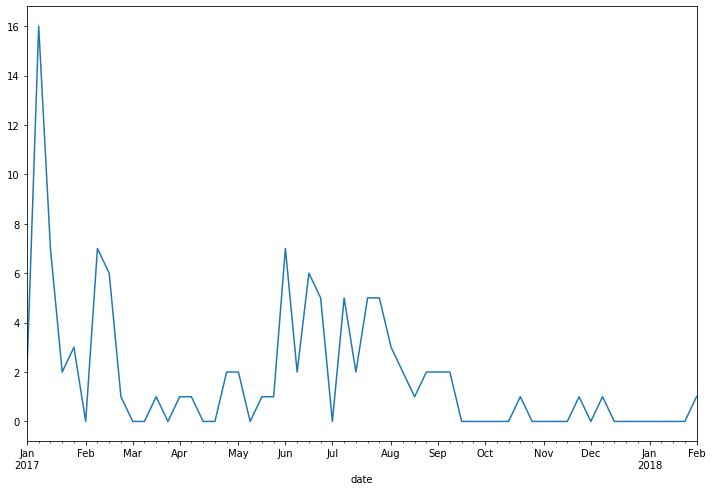

In [ ]:
negative_discounts.resample("W", on="date")["discount"].count().plot(figsize=(12,8), kind="line"); 

negative_discounts.loc[negative_discounts.date.between("2017-05-01", "2017-09-01")].head()

#### 3.1.2. Discount between -10 to 0

In [ ]:
negative_discounts_10 = ol_pro_m.loc[((ol_pro_m.discount >= -1) & (ol_pro_m.discount < 0)), :]
negative_discounts_10.groupby("name").nunique()
negative_discounts_10.groupby("name").product_quantity.nlargest(10)


# type = 12645406 - has 211 rows in "-1 to 0" group
# -5 to -4 => 56 no of rows
# -7 to -5 = 35 no of rows
# -1 to 0 = 808 no of rows 
# -5 to 0 => 1006 no of rows
# -10 to 0 => 1150 no of rows

name                                                       
95mm Optical Bay adapter iFixit MacBook Pro SATA      413      1
                                                      21010    1
Allocacoc PowerCube rewirable Regleta White / Purple  28151    1
Battery Kit complete change iFixit iPhone 4S Battery  48847    2
                                                      698      1
                                                              ..
internal battery for iPhone 5                         6278     1
                                                      8355     1
                                                      8431     1
                                                      9306     1
                                                      10055    1
Name: product_quantity, Length: 509, dtype: int64

### 3.2. Big Discounts >=700 EUR

In [ ]:
big_discounts = ol_pro_m.loc[ol_pro_m.discount >=700, :]
big_discounts.groupby(["type", "name"]).count()
big_discounts.groupby(["type", "name"]).product_quantity.sum()


type      name                                                                                             
1282      Second hand - Apple iMac 20 "Core 2 Duo 24GHz | 3GB RAM | 250GB HDD | Early 2008                      1
          Second hand - Apple iMac 24 "Core 2 Duo 28 GHz | 4GB RAM | 500GB HDD                                  3
          Second hand - Apple iMac 27 "Core i5 Quad-Core 27GHz | 4GB RAM | 1TB HDD | Mid 2011 (MC813LL / A)     1
24895185  Apple Watch the 1st Gen. 42mm Case Stainless steel strap Silver                                       3
          The 1st Gen. 42mm Apple Watch Stainless Steel Case Black Strap Stainless Steel Black Space            3
5,43E+15  Second hand - Apple iMac 20 "Core 2 Duo 226GHz | 2GB RAM | 160GB HDD                                 15
          Second hand - Apple iMac 20 "Core 2 Duo 24GHz | 2GB RAM | 250GB HDD                                   3
          Second hand - Apple iMac 20 "Core 2 Duo 24GHz | 4GB RAM | 250GB HDD                 

**Big discounts come from second-hand imacs (majority in Q2-Q4 2017)**

* All of the discounts >= 1000€ are second-hand iMacs (9 orderlines)**
* Most of the discounts between 700€ and 1000€ are second-hand iMacs (26 out of 31 orderlines).**
* There are 6 apple-watches with a discount in the same range.

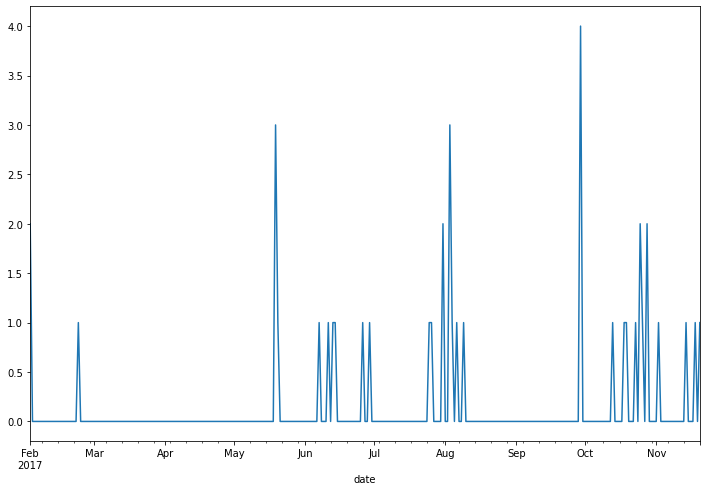

In [ ]:
big_discounts.resample("D", on="date")["discount"].count().plot(figsize=(12,8), kind="line"); 

# 4. CREATING THE CATEGORY


In [ ]:
o_ol_pro_m.head()

NameError: ignored

In [ ]:
products_ql.head()

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364


## 4.1 

In [ ]:
#merged with ol_pro to have look at revenue
ol_pd_pd = ol_pro_m.merge(products_ql, on='name')
ol_pd_pd.head()

,order_id,product_quantity,sku_x,unit_price,date,unit_price_total,name,price_x,in_stock_x,type_x,brand,discount,sku_y,desc,price_y,in_stock_y,type_y
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1,12755395,OWC,13.5,OWC0100,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
1,299404,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1,12755395,OWC,13.5,OWC0100,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
2,300650,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1,12755395,OWC,11.0,OWC0100,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
3,300760,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1,12755395,OWC,11.0,OWC0100,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
4,301975,1,OWC0100,49.99,2017-01-03 20:04:54,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1,12755395,OWC,11.0,OWC0100,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395


In [ ]:
ol_pd_pd.groupby("desc").unit_price_total.sum().nlargest(10)

desc
New iPhone SE with 4-inch screen 32 free GB.                                                                   187178.42
99% Professional Monitor sRGB color calibrator cable USB-C connection for Mac and PC                           141703.80
New iPhone 6 32GB Space Gray                                                                                   104560.64
New iPhone screen 4-inch 128 GB free.                                                                           92081.29
Apple AirPods wireless headsets and cargo transport box                                                         86473.26
42mm Apple Watch series 3 with GPS altimeter and submersible                                                    85551.22
Apple iPhone 64GB 8 Color Space Gray                                                                            85301.93
laptop MacBook Air 13 inch i5 18GHz 8GB RAM and 128GB SSD                                                       74964.06
Apple iPhone 8 Plus 64GB Go

In [213]:
#creating column Category
ol_pd_pd["category"] = ""
#ol_pd_pd.category.sort_values(ascending =  False)

0         
36273     
36275     
36276     
36277     
        ..
18143     
18144     
18145     
18146     
54421     
Name: category, Length: 54422, dtype: object

In [ ]:
#product_category_df.loc[product_category_df["name"].str.lower().str.contains("^.{0,7}apple iphone"), "category"] = "smartphone"
#ol_pd_pd.loc[ol_pd_pd["desc"].str.lower().str.contains("new iphone se"), :


ol_pd_pd.loc[ol_pd_pd["name"].str.lower().str.contains("^.{0,11}apple iphone"), "category"] = "Smartphone"
ol_pd_pd.loc[ol_pd_pd["name"].str.lower().str.contains("new iphone se"), "category"] = "Smartphone"
ol_pd_pd.loc[ol_pd_pd["name"].str.lower().str.contains("new iphone"), "category"] = "Smartphone"
ol_pd_pd.loc[ol_pd_pd["desc"].str.lower().str.contains("keyboard"), "category"] = "Keyboard"
ol_pd_pd.loc[ol_pd_pd["name"].str.lower().str.contains("watch"), "category"] = "Watches"
ol_pd_pd.loc[ol_pd_pd["name"].str.lower().str.contains("ipad"), "category"] = ""




In [209]:
ol_pd_pd.loc[ol_pd_pd["category"].str.contains("ipads and its accessories") , "category"] = ""


In [208]:
ol_pd_pd["category"].value_counts()

              49229
Smartphone     2753
Watches        1798
Keyboard        642
Name: category, dtype: int64

In [ ]:
ol_pd_pd.groupby(["category", "name"]).type_y.value_counts().nlargest(25)

category    name                                                                  type_y  
            IPhone AppleCare Protection Plan                                      1231        867
            AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch  5384        511
            Apple Lightning Cable Connector to USB 1m White (OEM)                 1230        478
            EarPods Apple Headphones with Remote and Mic (OEM)                    5384        378
            Samsung 850 EVO SSD Disk 500GB                                        12215397    298
            Red 4TB WD 35 "Mac PC hard drive and NAS                              12655397    289
            QNAP TS-431P NAS                                                      12175397    276
            Crucial MX300 525GB SSD Disk                                          12215397    269
Smartphone  Apple iPhone 6 32GB Space Gray                                        21561716    260
            QNAP TS-231P NA

In [ ]:
ol_pd_pd.loc[ol_pd_pd["name"] == "QNAP TS-231P NAS"]

,order_id,product_quantity,sku_x,unit_price,date,unit_price_total,name,price_x,in_stock_x,type_x,brand,discount,sku_y,desc,price_y,in_stock_y,type_y,category
24057,306886,1,QNA0204,194.99,2017-01-10 22:36:03,194.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,21.6,QNA0204,2-bay NAS server with 2 LAN ports and a powerf...,216.59,0,12175397,
24058,306886,1,QNA0204,194.99,2017-01-10 22:36:03,194.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,21.6,PAC1757,4TB NAS capacity (2x2TB) WD Red hard drives fo...,414.59,0,12175397,
24059,306886,1,QNA0204,194.99,2017-01-10 22:36:03,194.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,21.6,PAC1758,6TB NAS capacity (2x3TB) WD Red hard drives fo...,474.59,0,12175397,
24060,306886,1,QNA0204,194.99,2017-01-10 22:36:03,194.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,21.6,PAC1759,8TB NAS capacity (2x4TB) WD Red hard drives fo...,554.59,0,12175397,
24061,306886,1,QNA0204,194.99,2017-01-10 22:36:03,194.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,21.6,PAC1760,NAS with 12TB capacity (2x6TB) WD Red hard dri...,726.59,0,12175397,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24292,383360,1,QNA0204,206.99,2017-07-28 13:25:48,206.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,9.6,PAC1751,4TB NAS capable Seagate Hard Drives for Mac an...,436.57,0,12175397,
24293,383360,1,QNA0204,206.99,2017-07-28 13:25:48,206.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,9.6,PAC1752,NAS 6TB capacity Seagate Hard Drives for Mac a...,496.57,0,12175397,
24294,383360,1,QNA0204,206.99,2017-07-28 13:25:48,206.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,9.6,PAC1753,8TB NAS capable Seagate Hard Drives for Mac an...,576.57,0,12175397,
24295,383360,1,QNA0204,206.99,2017-07-28 13:25:48,206.99,QNAP TS-231P NAS,216.59,0,12175397,QNAP,9.6,PAC1754,NAS with 12TB capacity Seagate Hard Drives for...,776.57,0,12175397,


In [ ]:
ol_pd_pd["category"].value_counts()

              48894
smartphone     2753
Watches        2133
Keyboard        642
Name: category, dtype: int64